**OBJECTIVE:** Analyse collected data of London and other cities

**AUTHOR:** Joshua Xu

**LAST EDITED:** 2024-10-26

---


# Data Analysis

In this notebook, I will be using the data I have collected to conduct some exploratory data anlaysis, primarily using the panda module.

In [15]:
import json
import requests
import pandas as pd
import numpy as np

## 1. Preparation

We begin by converting our data in a data frame to have a better understanding of our given data:

In [16]:
with open('../DataCollection/Data/all_data.json') as file:
    data = json.load(file)

df = pd.DataFrame(data)
df

,London,Porto Novo,Kigali,Apia,Tiraspol,Dublin,Ljubljana,Kuwait City,Bangkok,Santo Domingo,Brasiléia
Date,"[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0...","[2023-01-01, 2023-01-02, 2023-01-03, 2023-01-0..."
Weather code,"[53, 51, 53, 51, 51, 53, 55, 53, 51, 61, 61, 5...","[2, 2, 1, 3, 3, 3, 1, 1, 1, 1, 2, 3, 2, 1, 1, ...","[2, 2, 51, 51, 61, 2, 51, 3, 51, 63, 63, 63, 5...","[53, 61, 63, 63, 65, 65, 63, 63, 63, 55, 2, 61...","[1, 0, 3, 3, 51, 51, 71, 71, 51, 51, 3, 71, 3,...","[53, 3, 63, 51, 61, 53, 53, 55, 3, 63, 73, 53,...","[3, 3, 51, 51, 3, 3, 3, 55, 63, 51, 3, 51, 61,...","[1, 3, 3, 61, 3, 0, 0, 2, 63, 51, 0, 0, 53, 61...","[1, 2, 3, 3, 1, 3, 3, 3, 3, 63, 51, 51, 51, 51...","[51, 53, 51, 51, 63, 63, 65, 63, 63, 63, 61, 5...","[63, 51, 51, 63, 63, 51, 3, 51, 61, 63, 63, 61..."
Precipitation sum,"[4.0, 0.2, 3.2, 0.9, 0.1, 1.2, 5.0, 1.8, 0.3, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.1, 1.5, 2.7, 0.0, 0.1, 0.0, 0.2, ...","[2.2, 9.8, 8.3, 22.2, 44.8, 171.2, 40.3, 16.6,...","[0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.2, 1.4, 0.6, ...","[1.3, 0.0, 16.7, 0.2, 4.9, 1.5, 2.0, 1.1, 0.0,...","[0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 3.5, 20.0,...","[0.0, 0.0, 0.0, 10.5, 0.0, 0.0, 0.0, 0.0, 27.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.8, 2.2, 1.5, 0.1, 11.2, 16.2, 17.1, 8.2, 9....","[10.1, 0.1, 0.8, 11.4, 27.0, 0.5, 0.0, 0.2, 3...."
Rain sum,"[4.0, 0.2, 3.2, 0.9, 0.1, 1.2, 5.0, 1.8, 0.3, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.1, 1.5, 2.7, 0.0, 0.1, 0.0, 0.2, ...","[2.2, 9.8, 8.3, 22.2, 44.8, 171.2, 40.3, 16.6,...","[0.0, 0.0, 0.0, 0.0, 0.3, 0.2, 0.0, 0.0, 0.6, ...","[1.3, 0.0, 16.7, 0.2, 4.9, 1.5, 2.0, 1.1, 0.0,...","[0.0, 0.0, 0.1, 0.2, 0.0, 0.0, 0.0, 3.5, 20.0,...","[0.0, 0.0, 0.0, 10.5, 0.0, 0.0, 0.0, 0.0, 27.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[1.8, 2.2, 1.5, 0.1, 11.2, 16.2, 17.1, 8.2, 9....","[10.1, 0.1, 0.8, 11.4, 27.0, 0.5, 0.0, 0.2, 3...."
Shower sum,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
Precipitation hours,"[12.0, 2.0, 14.0, 5.0, 1.0, 3.0, 11.0, 8.0, 2....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 6.0, 7.0, 0.0, 1.0, 0.0, 1.0, ...","[10.0, 17.0, 17.0, 23.0, 22.0, 24.0, 24.0, 23....","[0.0, 0.0, 0.0, 0.0, 2.0, 2.0, 2.0, 13.0, 6.0,...","[5.0, 0.0, 18.0, 1.0, 7.0, 3.0, 6.0, 1.0, 0.0,...","[0.0, 0.0, 1.0, 2.0, 0.0, 0.0, 0.0, 12.0, 24.0...","[0.0, 0.0, 0.0, 22.0, 0.0, 0.0, 0.0, 0.0, 15.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[8.0, 9.0, 8.0, 1.0, 9.0, 12.0, 14.0, 9.0, 9.0...","[8.0, 1.0, 4.0, 10.0, 22.0, 2.0, 0.0, 2.0, 4.0..."


We can now go about answering the question: ***'Is London really as rainy as the movies make it out to be?'*** by answering the following questions...

## 2.1 Does London rain frequently?

To answer this, we can explore the datat on *Weather code* - Using [WMO Weather Interpretation Codes Guide](https://open-meteo.com/en/docs), we can see that:


| Code | Description |
| -------- | ------- |
| 0  | Clear Sky |
| 1, 2, 3 | Mainly clear, partly cloudy, and overcast |
| 45, 48    | Fog and depositing rime fog |
| 51, 53, 55    | Drizzle: Light, moderate, and dense intensity |
| 56, 57    | Freezing Drizzle: Light and dense intensity |
| 61, 63, 65    | Rain: Slight, moderate and heavy intensity |
| 66, 67    | Freezing Rain: Light and heavy intensity |
| 71, 73, 75    | Snow fall: Slight, moderate, and heavy intensity |
| 77    | Snow grains |
| 80, 81, 82    | Rain showers: Slight, moderate, and violent |
| 85, 86    | Snow showers slight and heavy |
| 95  *  | Thunderstorm: Slight or moderate |
| 96  *  | Thunderstorm with slight and heavy hail |


(*) Thunderstorm forecasts with hail is only available in central Europe 


Let's create a function to sort the date for weather code in London into different catogories:

In [17]:
# Defining function to catogorise weather code
def weather_code_sort(list: list):

    # Defining different levels of rain
    moderate_rain = [51, 53, 56, 61, 63, 66, 80, 81]
    heavy_rain = [55, 57, 65, 67, 82, 95, 96]

    # Defining weather catogories
    rain = moderate_rain + heavy_rain
    snow = [71, 73, 75, 77, 85, 86]
    others = [0, 1, 2, 3, 45, 48]

    # Creating empty lists to sort data into
    moderate_rain_data = []
    heavy_rain_data = []
    snow_data = []
    others_data = []

    for i in list:
        if i in moderate_rain:
            moderate_rain_data.append(i)
        if i in heavy_rain:
            heavy_rain_data.append(i)
        if i in snow:
            snow_data.append(i)
        if i in others:
            others_data.append(i)
        else:
            pass

    rain_data = moderate_rain_data + heavy_rain_data
    
    # Finally, creating a dictionary to sort the data count into
    dict = {
        'Light to Moderate Rain': len(moderate_rain_data),
        'Heavy Rain': len(heavy_rain_data),
        'Snow': len(snow_data),
        'Total Rain': len(rain_data),
        'Others': len(others_data)
    }
    
    return dict

We can now use this function to apply to our data frame:

In [18]:
weather_code_sort(df['London']['Weather code'])

{'Light to Moderate Rain': 204,
 'Heavy Rain': 19,
 'Snow': 6,
 'Total Rain': 223,
 'Others': 137}

Applying this function to all countries, we can construct a sub data frame for analysis and visualisation:

In [19]:
# Applying to this function to all entries in the 'Weather code' row of the data frame
WC = df.loc['Weather code'].apply(weather_code_sort)

# Constructing sub data frame with appropriate columns and rows
dfWC = pd.DataFrame(WC.tolist(), index=WC.index)
dfWC


,Light to Moderate Rain,Heavy Rain,Snow,Total Rain,Others
London,204,19,6,223,137
Porto Novo,62,0,0,62,304
Kigali,223,28,0,251,115
Apia,304,30,0,334,32
Tiraspol,123,14,19,137,210
Dublin,255,15,11,270,85
Ljubljana,159,21,24,180,162
Kuwait City,37,5,0,42,324
Bangkok,224,36,0,260,106
Santo Domingo,304,44,0,348,18


We can visualise this data to give us a better understanding, e.g., London's porportion of yearly proportion of rain can be visualised suitably using a pie chart:

<Axes: ylabel='London 2023-2024 Weather Distribution'>

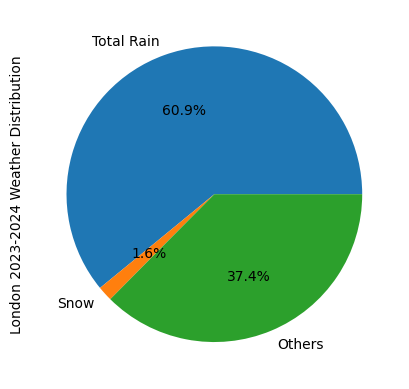

In [20]:
dfWC.loc['London',['Total Rain', 'Snow', 'Others']].plot.pie(autopct='%1.1f%%', ylabel = 'London 2023-2024 Weather Distribution')

It's clear to see that rain is indeed the most common weather type in London! We can also show this with code with the exact proportion:

In [21]:
wc_max_london = dfWC.loc['London'].idxmax()
print(f"The column with the highest value in London is '{wc_max_london}'.")

ld_rain_percent = (dfWC.loc['London', ['Total Rain']] / dfWC.loc['London', ['Total Rain', 'Snow', 'Others']].sum() * 100).iloc[0]

print(f"The proportion of {wc_max_london} is {ld_rain_percent: .2f}% in London.")


The column with the highest value in London is 'Total Rain'.
The proportion of Total Rain is  60.93% in London.


**But how does London compare against all the cities sampled?**

Adjusting what our previous code:

In [22]:
wc_max = dfWC.idxmax(axis=1)

rainy_cities = []
for city, max_column in wc_max.items():
    if max_column == 'Total Rain'and city != 'London':
        rainy_cities.append(city)
    
print(f"There are {len(rainy_cities)} other RAINY cities in the sample!") 

There are 7 other RAINY cities in the sample!


*Was London the rainiest of them all?*

In [23]:
# Let's create a function to make this process easily repeatable in case of repeat trials 

def check_rainiest(dataframe):
    rainiest_city = dataframe['Total Rain'].idxmax()

    rainiest_percent = (dataframe['Total Rain'].max() / 366 * 100)

    if rainiest_city == 'London':
        print(f"Yup, the rainiest city was London!")
    else:
        print(f"The rainiest city was in fact {rainiest_city}!")

        print(f"{rainiest_city} rained for {rainiest_percent:.2f}% of the time!")

check_rainiest(dfWC)

The rainiest city was in fact Santo Domingo!
Santo Domingo rained for 95.08% of the time!


If we were to rank them, where would London be?

In [24]:
dfWC['Rain Rank'] = dfWC['Total Rain'].rank(ascending=False).astype(int)


print(f"Out of all the cities, London was {int(dfWC.loc[['London'], ['Rain Rank']].iloc[0])}th overall!")

Out of all the cities, London was 7th overall!


C:\Users\xujos\AppData\Local\Temp\ipykernel_27304\2849369225.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Out of all the cities, London was {int(dfWC.loc[['London'], ['Rain Rank']].iloc[0])}th overall!")


Given the sample cities we chose, it is clear that London **does not** rain that frequently in comparison!

The visualisation for this graph is find [here](DataVisualisation.ipynb).

## 2.1* Moderate vs Heavy Rain

Given the sub categories of rain types we have, we can use also see how frequently London *REALLY RAINS*, compared to other cities.

We can easily find out the percentage of Heavy Rain in a year for all the cities:

In [25]:
dfWC['Heavy Rain Percentage'] = (dfWC['Heavy Rain'] / dfWC['Total Rain'] * 100).round(2)

dfWC

,Light to Moderate Rain,Heavy Rain,Snow,Total Rain,Others,Rain Rank,Heavy Rain Percentage
London,204,19,6,223,137,7,8.52
Porto Novo,62,0,0,62,304,10,0.00
Kigali,223,28,0,251,115,6,11.16
Apia,304,30,0,334,32,2,8.98
Tiraspol,123,14,19,137,210,9,10.22
Dublin,255,15,11,270,85,4,5.56
Ljubljana,159,21,24,180,162,8,11.67
Kuwait City,37,5,0,42,324,11,11.90
Bangkok,224,36,0,260,106,5,13.85
Santo Domingo,304,44,0,348,18,1,12.64


In [26]:
print(f"Out of the {int(dfWC.loc[['London'], ['Total Rain']].iloc[0])} days that London rained, {int(dfWC.loc[['London'], ['Heavy Rain']].iloc[0])} of those were RAINY, i.e., {float(dfWC.loc[['London'], ['Heavy Rain Percentage']].iloc[0])}% of rainy days were HEAVY!")

Out of the 223 days that London rained, 19 of those were RAINY, i.e., 8.52% of rainy days were HEAVY!


C:\Users\xujos\AppData\Local\Temp\ipykernel_27304\3008984216.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Out of the {int(dfWC.loc[['London'], ['Total Rain']].iloc[0])} days that London rained, {int(dfWC.loc[['London'], ['Heavy Rain']].iloc[0])} of those were RAINY, i.e., {float(dfWC.loc[['London'], ['Heavy Rain Percentage']].iloc[0])}% of rainy days were HEAVY!")
C:\Users\xujos\AppData\Local\Temp\ipykernel_27304\3008984216.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(f"Out of the {int(dfWC.loc[['London'], ['Total Rain']].iloc[0])} days that London rained, {int(dfWC.loc[['London'], ['Heavy Rain']].iloc[0])} of those were RAINY, i.e., {float(dfWC.loc[['London'], ['Heavy Rain Percentage']].iloc[0])}% of rainy days were HEAVY!")
C:\Users\xujos\AppData\Local\Temp\ipykernel_27

So, Did London at least POURED the most? 

In [27]:
# Again, defining a function for future investigations
def check_RAIN(dataframe):
    heaviest_rain_city = dataframe['Heavy Rain'].idxmax()
    heaviest_rain = dataframe['Heavy Rain'].max()
    heaviest_raintio_city = dataframe['Heavy Rain Percentage'].idxmax()
    heaviest_raintio = dataframe['Heavy Rain Percentage'].max()
    
    if heaviest_rain_city == 'London' or heaviest_raintio_city == 'London':
        print("Yes! London POURED the most!")
    else:
        print(f"The city with the most number of RAINY days was in fact {heaviest_rain_city} and the city with the highest ratio of RAINY days when they do rain was in fact {heaviest_raintio_city}!")
        print(f"{heaviest_rain_city} had {heaviest_rain} days of Heavy Rain and {heaviest_raintio_city} had {heaviest_raintio}% Heavy Rain out of all rainy days!")

check_RAIN(dfWC)

The city with the most number of RAINY days was in fact Santo Domingo and the city with the highest ratio of RAINY days when they do rain was in fact Bangkok!
Santo Domingo had 44 days of Heavy Rain and Bangkok had 13.85% Heavy Rain out of all rainy days!


Better luck next time London :(

## 2.2 Does London get the wettest?

To answer this, we can explore the 'Precipitation Sum', 'Rain Sum' and 'Shower Sum' data (Precipitation Sum is a combination of Rain Sum, Showers Sum and Snowfall Sum), which are measured in Litres of rain per Square Metre.

We can first address an obvious characteristic of our collected data: the precipitation sum seems to all be consistently 0 across the cities, we can check this with this code:

In [28]:
# We search for the maximum value across all cities to see if 'Shower sum' ever exceeds 0
df.loc['Shower sum'].apply(max)

London           0.0
Porto Novo       0.0
Kigali           0.0
Apia             0.0
Tiraspol         0.0
Dublin           0.0
Ljubljana        0.0
Kuwait City      0.0
Bangkok          0.0
Santo Domingo    0.0
Brasiléia        0.0
Name: Shower sum, dtype: float64

*This result should not surprise us - ['Shower' is defined to be a sudden and short burst of rainfall,](https://www.metoffice.gov.uk/weather/learn-about/weather/types-of-weather/rain/rain-and-showers#:~:text=Weather%20forecasts%20often%20refer%20to,and%20then%20it%20will%20clear.) hence will likely result in a neglible amount of total precipitation.*

We can thus diregard the Shower Sum data collected.

Our main point of focus is thus 'Rain sum' for all the cities, and we can concentrate on a smaller data frame:

In [29]:
# Using .explode we can convert the list in each entry into expanded data frame for the 'Rain sum' row
dfRS = df.loc[['Rain sum'],].explode(df.columns.to_list(), ignore_index=True)

dfRS

,London,Porto Novo,Kigali,Apia,Tiraspol,Dublin,Ljubljana,Kuwait City,Bangkok,Santo Domingo,Brasiléia
0,4.0,0.0,0.0,2.2,0.0,1.3,0.0,0.0,0.0,1.8,10.1
1,0.2,0.0,0.0,9.8,0.0,0.0,0.0,0.0,0.0,2.2,0.1
2,3.2,0.0,0.1,8.3,0.0,16.7,0.1,0.0,0.0,1.5,0.8
3,0.9,0.0,1.5,22.2,0.0,0.2,0.2,10.5,0.0,0.1,11.4
4,0.1,0.0,2.7,44.8,0.3,4.9,0.0,0.0,0.0,11.2,27.0
...,...,...,...,...,...,...,...,...,...,...,...
361,0.4,0.0,3.4,0.4,0.0,1.8,0.0,0.4,0.0,3.1,0.7
362,1.5,0.0,0.5,2.7,0.0,0.3,0.2,0.0,0.0,2.0,0.5
363,3.6,0.0,6.0,2.9,0.0,13.8,0.0,0.1,0.0,4.1,3.8
364,7.6,0.0,1.1,6.7,0.0,2.2,2.8,0.0,0.0,1.8,18.4


We can straight away find out which city had the highest sum of rain over the whole year:

In [30]:
# Making a series to help with analysis
sRSS = dfRS.apply(sum)

dfRSmax = sRSS.idxmax()
dfRSmaxn = sRSS.max()

print(f"The city with the highest Rain Sum is {dfRSmax}, with a total Rain Sum of {int(dfRSmaxn)} Litres of rain per Square Meter!")

The city with the highest Rain Sum is Apia, with a total Rain Sum of 2362 Litres of rain per Square Meter!


How did London do compared across all the cities?

In [31]:
# We first convert the series to a Data Frame
dfRSS = sRSS.to_frame(name='Gross Rain Sum')

# Adding a new column ranking the cities
dfRSS['Rank'] = dfRSS.rank(ascending=False)

print(f"London was overall the {int(dfRSS.loc['London','Rank'])}th wettest city in the sample!")

London was overall the 8th wettest city in the sample!


## 2.3 How long does London rain for?

How rainy London is also crucially determined by the duration of rain when it does rain.

We can answer this question focusing the data on 'Precipitation hours.' 

In [32]:
# Using .explode again we expand the row of data on Precipitation hours into a sub dataframe
dfPH = df.loc[['Precipitation hours'],].explode(df.columns.to_list(), ignore_index=True)

dfPH

,London,Porto Novo,Kigali,Apia,Tiraspol,Dublin,Ljubljana,Kuwait City,Bangkok,Santo Domingo,Brasiléia
0,12.0,0.0,0.0,10.0,0.0,5.0,0.0,0.0,0.0,8.0,8.0
1,2.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
2,14.0,0.0,1.0,17.0,0.0,18.0,1.0,0.0,0.0,8.0,4.0
3,5.0,0.0,6.0,23.0,0.0,1.0,2.0,22.0,0.0,1.0,10.0
4,1.0,0.0,7.0,22.0,2.0,7.0,0.0,0.0,0.0,9.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...
361,4.0,0.0,6.0,4.0,0.0,6.0,0.0,2.0,0.0,11.0,2.0
362,4.0,0.0,5.0,9.0,0.0,3.0,2.0,0.0,0.0,6.0,2.0
363,10.0,0.0,9.0,12.0,0.0,11.0,0.0,1.0,0.0,14.0,6.0
364,8.0,0.0,8.0,11.0,0.0,11.0,8.0,0.0,0.0,6.0,13.0


Summing up the hours of each city, we can see how long London rained for during 2023-2024, and how London did compared to the rest of the cities. 

In [33]:
dfPHs = dfRS.apply(sum).to_frame(name='Precipitation hours sum')

dfPHs['Rank'] = dfPHs.rank(ascending=False)

total_hours = 366 * 24

dfPHsMax = dfPHs['Precipitation hours sum'].idxmax()

dfPHsMaxn = max(dfPHs['Precipitation hours sum'])

print(f"London rained for {int(dfPHs.loc['London','Precipitation hours sum'])} hours between 2023-2024, i.e., {round((dfPHs.loc['London','Precipitation hours sum'])/total_hours * 100, 2)}% of the year!")

print(f"This would make London the {int(dfPHs.loc['London', 'Rank'])}th on the list, where {dfPHsMax} rained the longest, for {int(dfPHsMaxn)} hours, i.e., {round(dfPHsMaxn/total_hours*100, 2)}% of the year!")

London rained for 780 hours between 2023-2024, i.e., 8.88% of the year!
This would make London the 8th on the list, where Apia rained the longest, for 2362 hours, i.e., 26.89% of the year!


## 2.3* How likely are we to get rained on in London?

Using the 'Precipitation hours' data, we can get a more accurate understanding of how frequent we experience rain than simply the weather code. For varying durations of rain, our likelihood of actually being impacted by rain varies. 

Let us investigate this: 

In [42]:
def rain_likelihood(city):
# Establish different catogories
    highly_likely = []
    more_likely = []
    likely = []
    less_likely = []

# Classifying different hours of rain
    for day in city:
        if day in list(range(15,25)):
            highly_likely.append(day)
        elif day in list(range(9,15)):
            more_likely.append(day)
        elif day in list(range(3,9)):
            likely.append(day)
        elif day in list(range(0,3)):
            less_likely.append(day)

# Creating dictionary for each catogory
    dfRL = {
        'Highly likely': len(highly_likely),
        'More likely': len(more_likely),
        'Likely': len(likely),
        'Less likely': len(less_likely)
    }
        
    return dfRL


In [51]:
RL = dfPH.apply(rain_likelihood)

dfRL = pd.DataFrame(RL.to_list(), index=RL.index)
dfRL

,Highly likely,More likely,Likely,Less likely
London,15,57,106,188
Porto Novo,8,9,19,330
Kigali,5,42,127,192
Apia,100,82,114,70
Tiraspol,12,26,62,266
Dublin,29,61,141,135
Ljubljana,42,35,75,214
Kuwait City,2,4,22,338
Bangkok,25,44,144,153
Santo Domingo,38,147,139,42


It is clear to see:

In [57]:
print(f"It is {str(dfRL.loc['London',].idxmax())} to be impacted by London on most days!")

It is Less likely to be impacted by London on most days!
